Minimum loss: 412.152099609375
Final loss: 412.152099609375


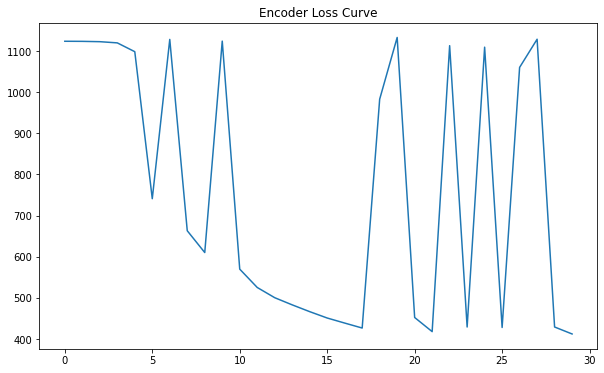

In [15]:
import matplotlib.pyplot as plt
import pickle
import os

ENCODER_DIR = 'trained_models/encoders/encoder_tissue_224_1024_256_30_1e-05_baseline'
with open(os.path.join(ENCODER_DIR, 'history.pickle'), 'rb') as file:
    history = pickle.load(file)

print('Minimum loss:', min(history['loss']))
print('Final loss:', history['loss'][-1])

plt.figure(figsize=(10, 6))
plt.title('Encoder Loss Curve')
plt.plot(history['loss'])
plt.show()

In [14]:
!python evaluate_classifier.py -d "trained_models/classifiers/barlow_fine_tune_tissue_224_0.5_1024_256_30_0.0005_baseline"

Figure(1000x600)
At early stop epoch,
	loss: 2.03432
	acc: 0.79768
	top_2_accuracy: 0.96367
	MCC: 0.72198
	val_loss: 2.05719
	val_acc: 0.78361
	val_top_2_accuracy: 0.95902
	val_MCC: 0.70259

Calculating statistics...
Found 12550 validated image filenames belonging to 5 classes.
^C
Traceback (most recent call last):
  File "evaluate_classifier.py", line 81, in <module>
    separate_evaluation_groups=True
  File "/tf/ssl/utils/datasets.py", line 75, in get_generators
    df = get_dataset_df(config, random_seed)
  File "/tf/ssl/utils/datasets.py", line 29, in get_dataset_df
    df['slide_name'].append(slide_name)
KeyboardInterrupt
